# 1D variably saturated flow

In [1]:
import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

Find Tecplot point files in current directory

In [2]:
path = []
path.append('.')

files = pft.get_tec_filenames('1D_vsat_flow',range(5)) # CHANGE this for new filename and range
filenames = pft.get_full_paths(path,files)

## Plot saturation profile over time

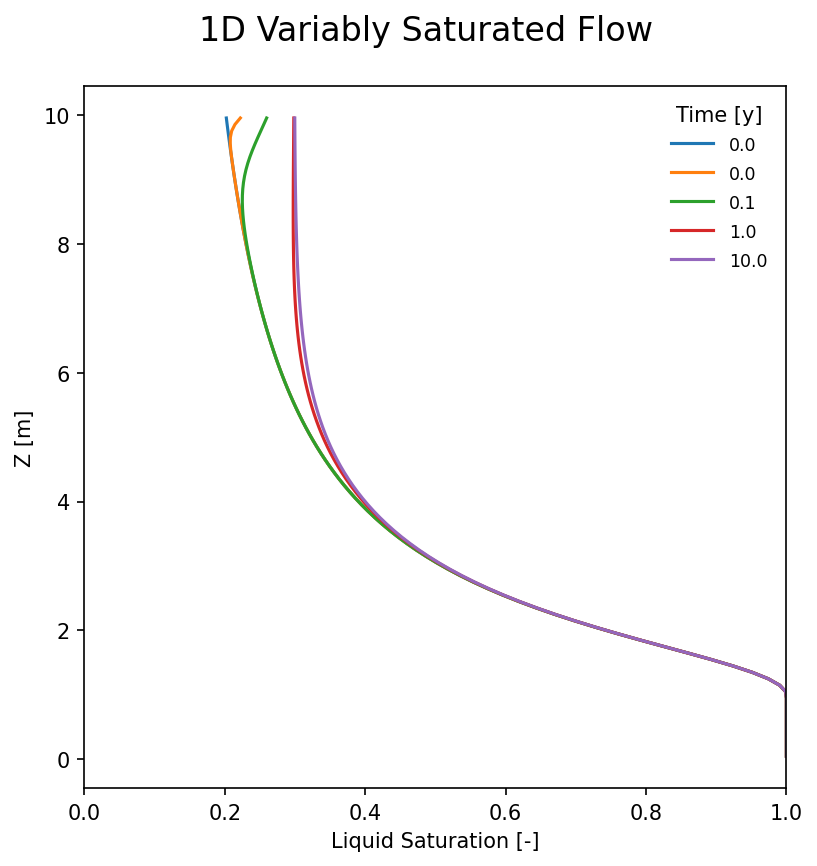

In [5]:
f = plt.figure(figsize=(6,6), dpi=150)
plt.subplot(1,1,1)
f.suptitle("1D Variably Saturated Flow",fontsize=16)
plt.xlabel('Liquid Saturation [-]')
plt.ylabel('Z [m]')

plt.xlim(0.,1.)

# read data and plot 
for ifile in range(len(filenames)):
    # select the 5th (Liquid Saturation) and 3rd (Z [m]) columns 
    # as the data array (x,y)
  data = pft.Dataset(filenames[ifile],5,3) 
  plt.plot(data.get_array('x'),data.get_array('y'),label = f'{float(data.title):.1f}'
)

# set legend
plt.legend(loc=1,title='Time [y]')
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')
plt.gca().get_legend().get_frame().set_fill(False)
plt.gca().get_legend().draw_frame(False)

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.12,right=.9)

plt.show()